# Figures for paper 'Artificial SA-I and RA-I Afferents for Tactile Sensing of Ridges and Gratings'

* code to generate Figure 4, 6, 7 and 8 of paper

To run, edit dir_data to point to the experimental data and results

In [2]:
import os, pickle
import numpy as np 
import scipy.io as sio
from sklearn.neighbors import KernelDensity
from scipy.special import erfinv

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, rc
from matplotlib.pyplot import subplots
import seaborn as sns
sns.set()

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def open_obj(name):
    with open(name + '.pkl', 'rb') as f:
        obj = pickle.load(f)
    return obj

def rotate_pins(locs, theta=0):
    R = np.array(((np.cos(theta),-np.sin(theta)), (np.sin(theta), np.cos(theta))))
    locs_rot = [np.matmul(R, loc) for loc in locs]
    return np.array(locs_rot)

dir_figures = os.environ["DATAPATH"] + r"/open/afferents-tactile-gratings-jrsi2022/figures"
os.makedirs(dir_figures, exist_ok=True)

## Fig. 4

### A

In [2]:
dir_data = os.environ["DATAPATH"] + r"/open/afferents-tactile-gratings-jrsi2022/experiment_1a"

sets = ["slow", "fast"]
n_sets = len(sets)

In [3]:
features_SA = open_obj(dir_data + r"/features_SA")
features_RA = open_obj(dir_data + r"/features_RA")
pins = open_obj(dir_data + r"/pins")

time_stamp = [open_obj(dir_data + rf"/{set}/x_0_time_stamp") for set in sets] 
robot_times = [open_obj(dir_data + rf"/{set}/robot_times") for set in sets]

n_pins = 19

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

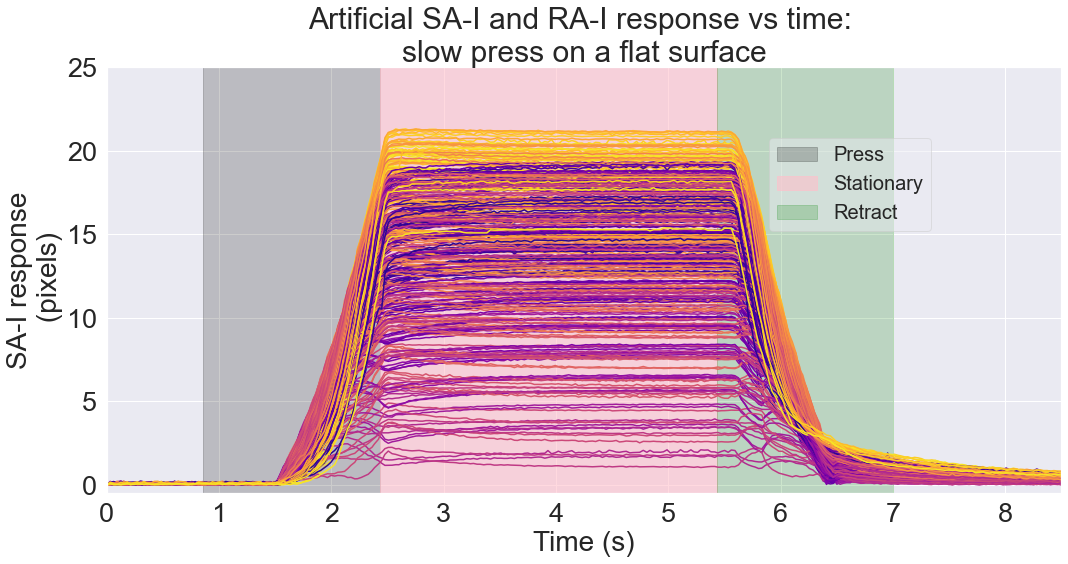

In [8]:
colours = sns.color_palette(sns.mpl_palette("plasma", n_pins))
rc('xtick', labelsize=27) 
rc('ytick', labelsize=27)

fig4A, axs = subplots(1,1, figsize=(15,8))
plt.subplots_adjust(bottom=0.3, top=0.8)
for i in range(n_pins):
    for j in range(n_pins):
        sns.lineplot(time_stamp[0][11:310]-time_stamp[0][11], features_SA[0][:299,i,j], ax=axs, color=colours[j])
axs.set_xlim(0,8.5)
axs.set_ylim(-0.5,25)
axs.set_ylabel("SA-I response\n (pixels)", fontsize=28) 
axs.set_xlabel("Time (s)", fontsize=28) 
axs.fill_between(np.linspace(robot_times[0][0]-time_stamp[0][11],robot_times[0][1]-time_stamp[0][11],500), -0.5, 25, color='black', alpha=0.2, label='Press')
axs.fill_between(np.linspace(robot_times[0][1]-time_stamp[0][11],robot_times[0][2]-time_stamp[0][11],500), -0.5, 25, color='pink', alpha=0.6, label='Stationary')
axs.fill_between(np.linspace(robot_times[0][2]-time_stamp[0][11],robot_times[0][3]-time_stamp[0][11],500), -0.5, 25, color='green', alpha=0.2, label='Retract')
axs.set_title('Artificial SA-I and RA-I response vs time: \n'+'slow press on a flat surface', fontsize=30)
fig4A.legend(loc = (0.72,0.59), fontsize = 20, framealpha=0.5)

plt.tight_layout()
fig4A.savefig(dir_figures + r"/fig4a.png")

### B

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

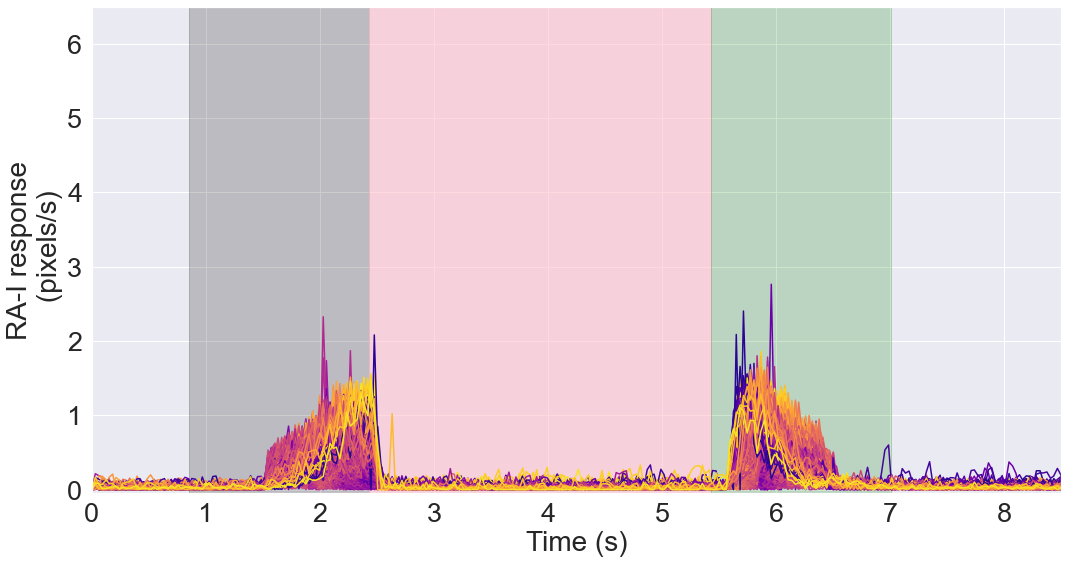

In [9]:
colours = sns.color_palette(sns.mpl_palette("plasma", n_pins))

fig4B, axs = subplots(1,1, figsize=(15,8))
plt.subplots_adjust(bottom=0.3, top=0.8)
for i in range(n_pins):
    for j in range(n_pins):
        sns.lineplot(time_stamp[0][11:310]-time_stamp[0][11], features_RA[0][:,i,j], ax=axs, color=colours[j])
axs.set_xlim(0, 8.5)
axs.set_ylim(-0.05, 6.5)
axs.set_ylabel('RA-I response\n (pixels/s)', fontsize=28) 
axs.set_xlabel('Time (s)',fontsize=28) 
axs.fill_between(np.linspace(robot_times[0][0]-time_stamp[0][11],robot_times[0][1]-time_stamp[0][11],500), -0.05, 6.5, color='black', alpha=0.2)
axs.fill_between(np.linspace(robot_times[0][1]-time_stamp[0][11],robot_times[0][2]-time_stamp[0][11],500), -0.05, 6.5, color='pink', alpha=0.6)
axs.fill_between(np.linspace(robot_times[0][2]-time_stamp[0][11],robot_times[0][3]-time_stamp[0][11],500), -0.05, 6.5, color='green', alpha=0.2)

plt.tight_layout()
fig4B.savefig(dir_figures + r"/fig4b.png")

### C

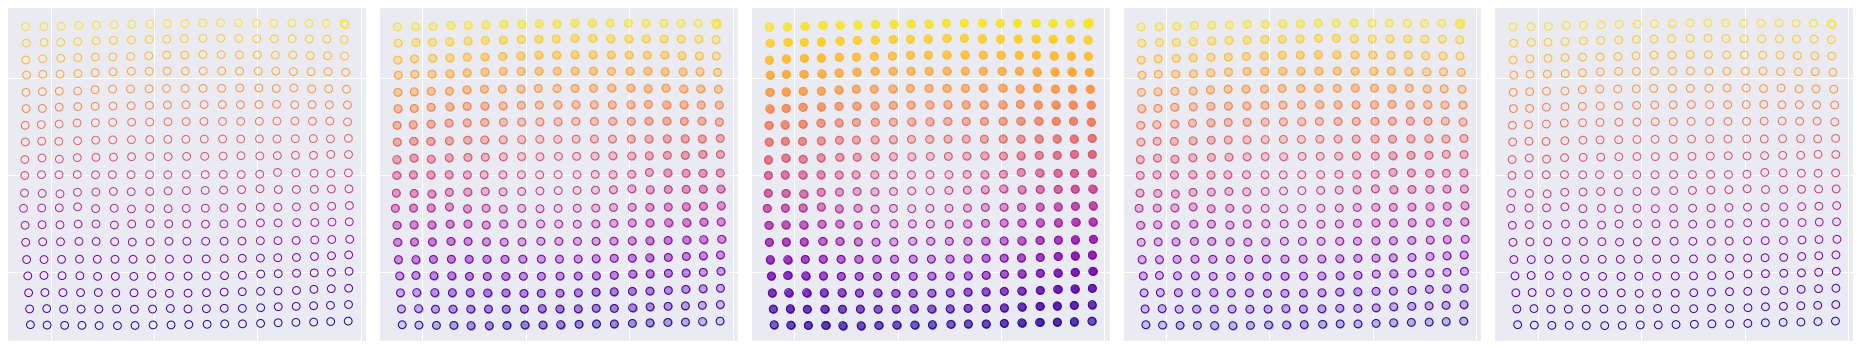

In [10]:
times = [0, 70, 135, 200, 280]
alphas = [0, 0.3, 0.8, 0.3, 0]

fig4C, axs = subplots(1,5, figsize=(26,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.02)
for k in range(len(times)):
    for i in range(n_pins):
        for j in range(n_pins):
            axs[k].scatter(pins[0][0,i,j], pins[0][1,i,j], edgecolors=colours[j], facecolors='none', s=60)
            axs[k].scatter(pins[0][0,i,j], pins[0][1,i,j], color=colours[j], s=60, alpha=features_SA[0][int(times[k]),i,j]/22)
            axs[k].set_xticklabels([])
            axs[k].set_yticklabels([])
    axs[k].scatter(485,355, edgecolors=colours[18], facecolors='none', s=60)
    axs[k].scatter(485,358, color=colours[18], s=60, alpha=alphas[k])

plt.tight_layout()
fig4C.savefig(dir_figures + r"/fig4c.png")

### D

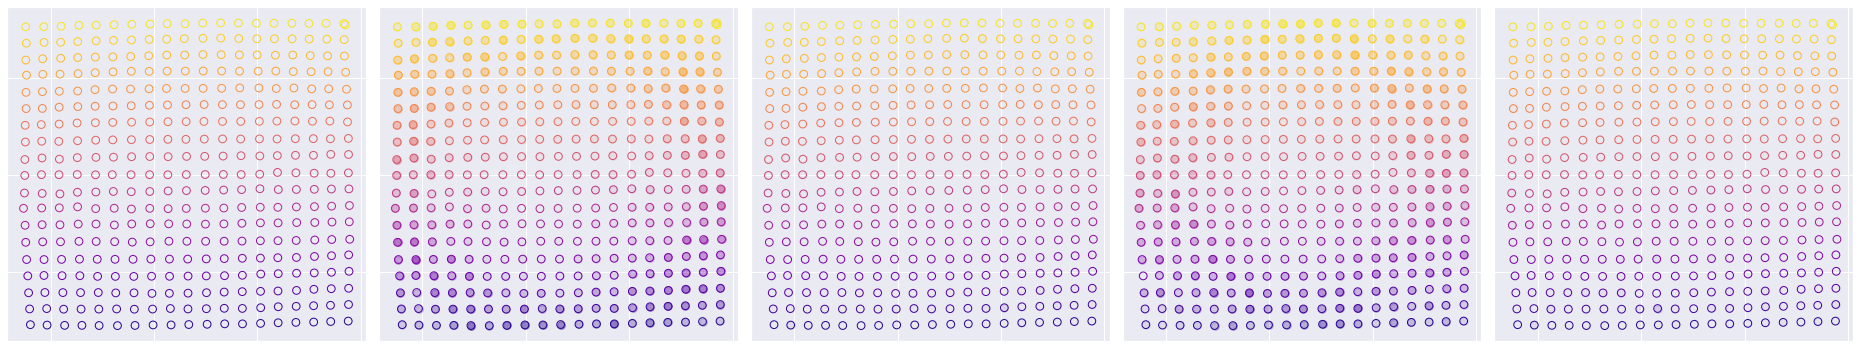

In [11]:
times = [0, 70, 135, 200, 280]
alphas = [0, 0.3, 0.0, 0.3, 0]

fig4D, axs = subplots(1,5, figsize=(26,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.02)
for k in range(len(times)):
    for i in range(n_pins):
        for j in range(n_pins):
            axs[k].scatter(pins[0][0,i,j], pins[0][1,i,j], edgecolors=colours[j], facecolors='none', s=60)
            axs[k].scatter(pins[0][0,i,j], pins[0][1,i,j], color=colours[j], s=60, alpha=features_RA[0][int(times[k]),i,j]/2.2)
            axs[k].set_xticklabels([])
            axs[k].set_yticklabels([])
    axs[k].scatter(485,355, edgecolors=colours[18], facecolors='none', s=60)
    axs[k].scatter(485,358, color=colours[18], s=60, alpha=alphas[k])

plt.tight_layout()
fig4D.savefig(dir_figures + r"/fig4d.png")

### F

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

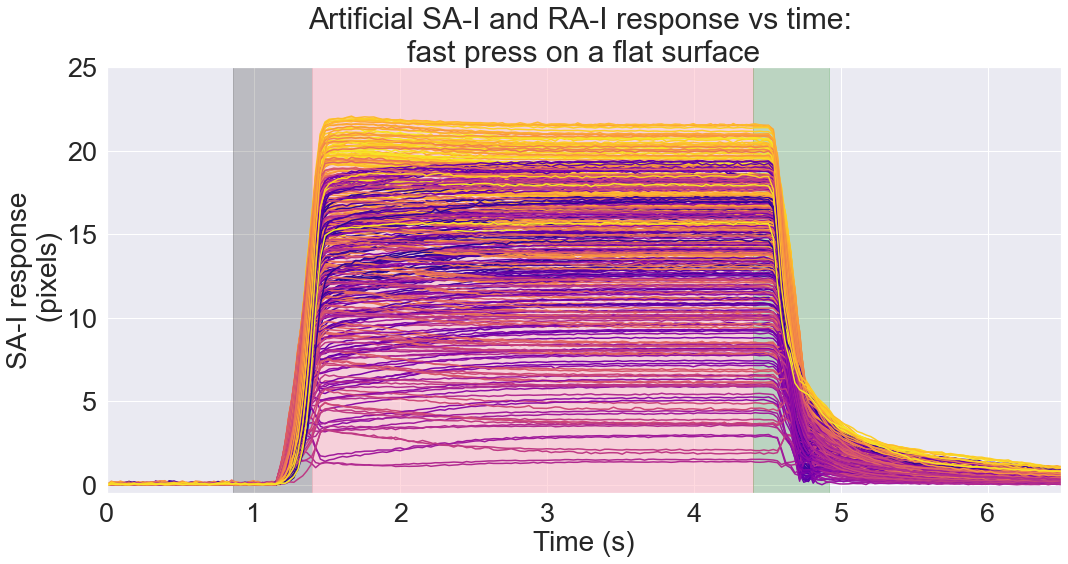

In [12]:
colours = sns.color_palette(sns.mpl_palette("plasma", 19))

fig4F, axs = subplots(1,1, figsize=(15,8))
plt.subplots_adjust(bottom=0.3, top=0.8)
for i in range(n_pins):
    for j in range(n_pins):
        sns.lineplot(time_stamp[1][11:241]-time_stamp[1][11], features_SA[1][:230,i,j], ax=axs, color=colours[j])
axs.set_xlim(0, 6.5)
axs.set_ylim(-0.5, 25)
axs.set_ylabel('SA-I response\n (pixels)', fontsize=28) 
axs.set_xlabel('Time (s)', fontsize=28) 
axs.fill_between(np.linspace(robot_times[1][0]-time_stamp[1][11],robot_times[1][1]-time_stamp[1][11],500), -0.5, 25, color='black', alpha=0.2, label='Press')
axs.fill_between(np.linspace(robot_times[1][1]-time_stamp[1][11],robot_times[1][2]-time_stamp[1][11],500), -0.5, 25, color='pink', alpha=0.6, label='Stationary')
axs.fill_between(np.linspace(robot_times[1][2]-time_stamp[1][11],robot_times[1][3]-time_stamp[1][11],500), -0.5, 25, color='green', alpha=0.2, label='Retract')
axs.set_title('Artificial SA-I and RA-I response vs time: \n'+'fast press on a flat surface', fontsize=30)

plt.tight_layout()
fig4F.savefig(dir_figures + r"/fig4f.png")

### G

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

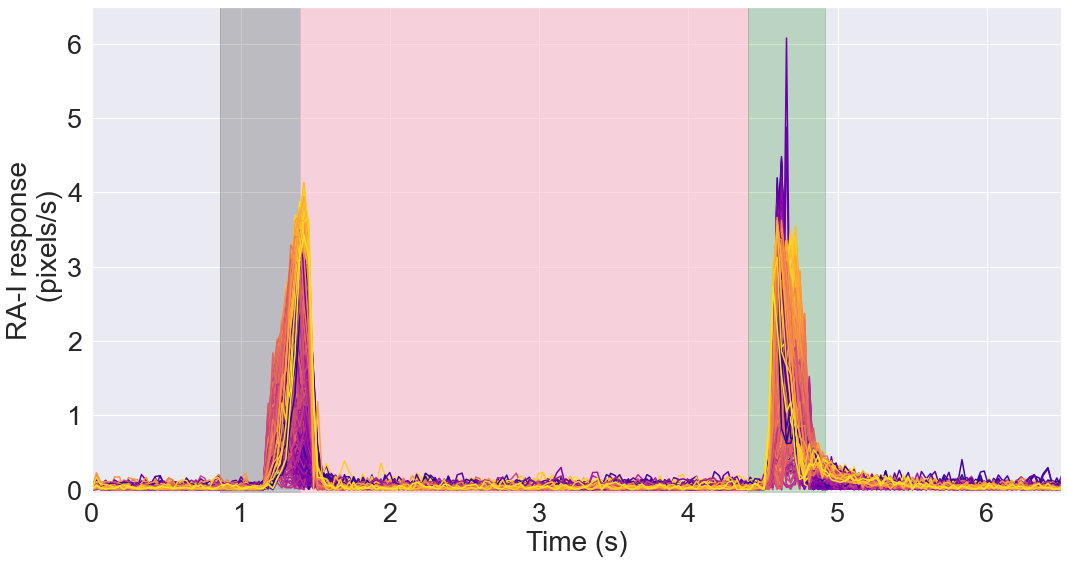

In [13]:
colours = sns.color_palette(sns.mpl_palette("plasma", 19))

fig4G, axs = subplots(1,1, figsize=(15,8))
plt.subplots_adjust(bottom=0.3, top=0.8)
for i in range(n_pins):
    for j in range(n_pins):
        sns.lineplot(time_stamp[1][11:241]-time_stamp[1][11], features_RA[1][:230,i,j], ax=axs, color=colours[j])
axs.set_xlim(0, 6.5)
axs.set_ylim(-0.05, 6.5)
axs.set_ylabel('RA-I response\n (pixels/s)', fontsize=28) 
axs.set_xlabel('Time (s)',fontsize=28) 
axs.fill_between(np.linspace(robot_times[1][0]-time_stamp[1][11],robot_times[1][1]-time_stamp[1][11],500), -0.05, 6.5, color='black', alpha=0.2)
axs.fill_between(np.linspace(robot_times[1][1]-time_stamp[1][11],robot_times[1][2]-time_stamp[1][11],500), -0.05, 6.5, color='pink', alpha=0.6)
axs.fill_between(np.linspace(robot_times[1][2]-time_stamp[1][11],robot_times[1][3]-time_stamp[1][11],500), -0.05, 6.5, color='green', alpha=0.2)

plt.tight_layout()
fig4G.savefig(dir_figures + r"/fig4g.png")

### H

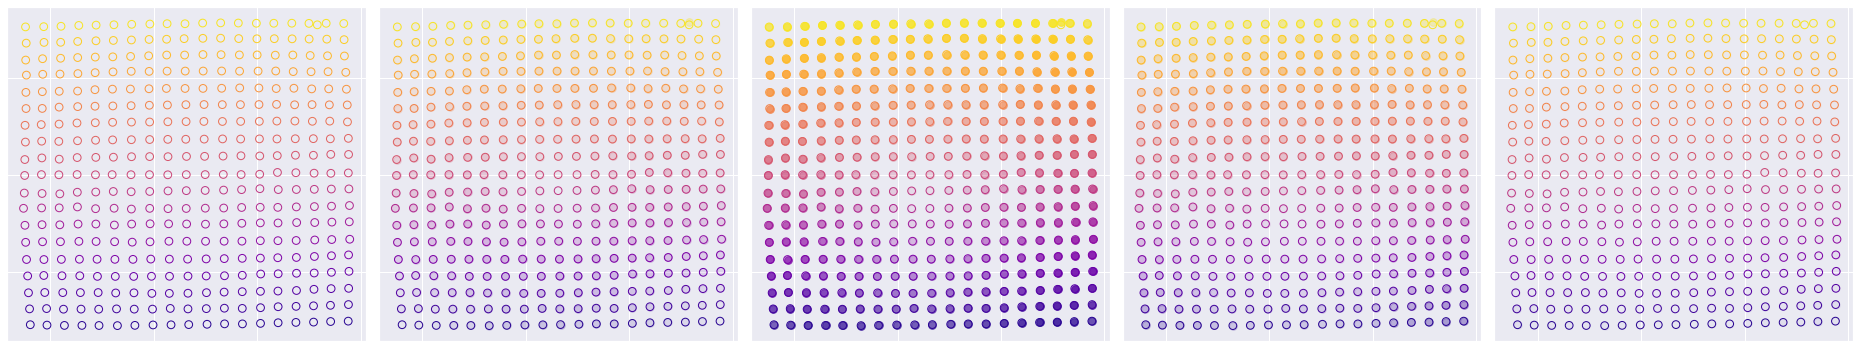

In [14]:
times = [0, 42, 100, 155, 200]
alphas = [0, 0.3, 0.8, 0.3, 0]

fig4H, axs = subplots(1,5, figsize=(26,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.02)
for k in range(len(times)):
    for i in range(n_pins):
        for j in range(n_pins):
            axs[k].scatter(pins[1][0,i,j], pins[1][1,i,j], edgecolors=colours[j], facecolors='none', s=60)
            axs[k].scatter(pins[1][0,i,j], pins[1][1,i,j], color=colours[j], s=60, alpha=features_SA[1][int(times[k]),i,j]/22)
            axs[k].set_xticklabels([])
            axs[k].set_yticklabels([])
    axs[k].scatter(458,355, edgecolors=colours[18], facecolors='none', s=60)
    axs[k].scatter(458,358, color=colours[18], s=60, alpha=alphas[k])

plt.tight_layout()
fig4H.savefig(dir_figures + r"/fig4h.png")

### I

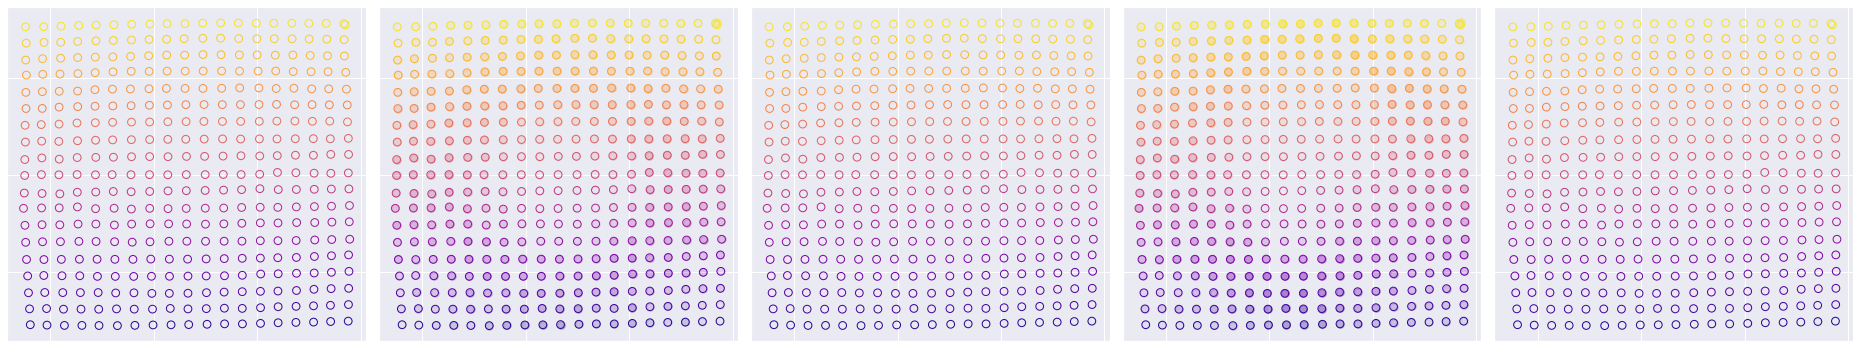

In [15]:
times = [0, 42, 100, 155, 200]
alphas = [0, 0.3, 0.0, 0.3, 0]

fig4I, axs = subplots(1,5, figsize=(26,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.02)
for k in range(len(times)):
    for i in range(n_pins):
        for j in range(n_pins):
            axs[k].scatter(pins[1][0,i,j], pins[1][1,i,j], edgecolors=colours[j], facecolors='none', s=60)
            axs[k].scatter(pins[1][0,i,j], pins[1][1,i,j], color=colours[j], s=60, alpha=features_RA[1][int(times[k]),i,j]/6.5)
            axs[k].set_xticklabels([])
            axs[k].set_yticklabels([])
    axs[k].scatter(485,355, edgecolors=colours[18], facecolors='none', s=60)
    axs[k].scatter(485,358, color=colours[18], s=60, alpha=alphas[k])

plt.tight_layout()
fig4I.savefig(dir_figures + r"/fig4i.png")

## Fig. 6

In [8]:
dir_data = os.environ["DATAPATH"] + r"/open/afferents-tactile-gratings-jrsi2022/experiment_1b"

features_SA = open_obj(dir_data + r"/features_SA")
features_RA = open_obj(dir_data + r"/features_RA")
pins = open_obj(dir_data + r"/pins")

n_stimuli = 7
n_positions = 424

In [3]:
stim_data = []
ephys_data = []
for i in range(n_stimuli):
     stim = sio.loadmat(dir_data + rf"/neural_data/stim{i+1}.mat")
     stim_data.append(stim[f'stim{i+1}'])
     ephys = sio.loadmat(dir_data + rf"/neural_data/data{i+1}.mat")
     ephys_data.append(ephys[f'aperiodic_{i+1}'])

### A

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From vers

C:\Users\nl13426\OneDrive - University of Bristol\Data onedrive/shared/nick_pestell/JRSI_gratings/figures/fig6a.png


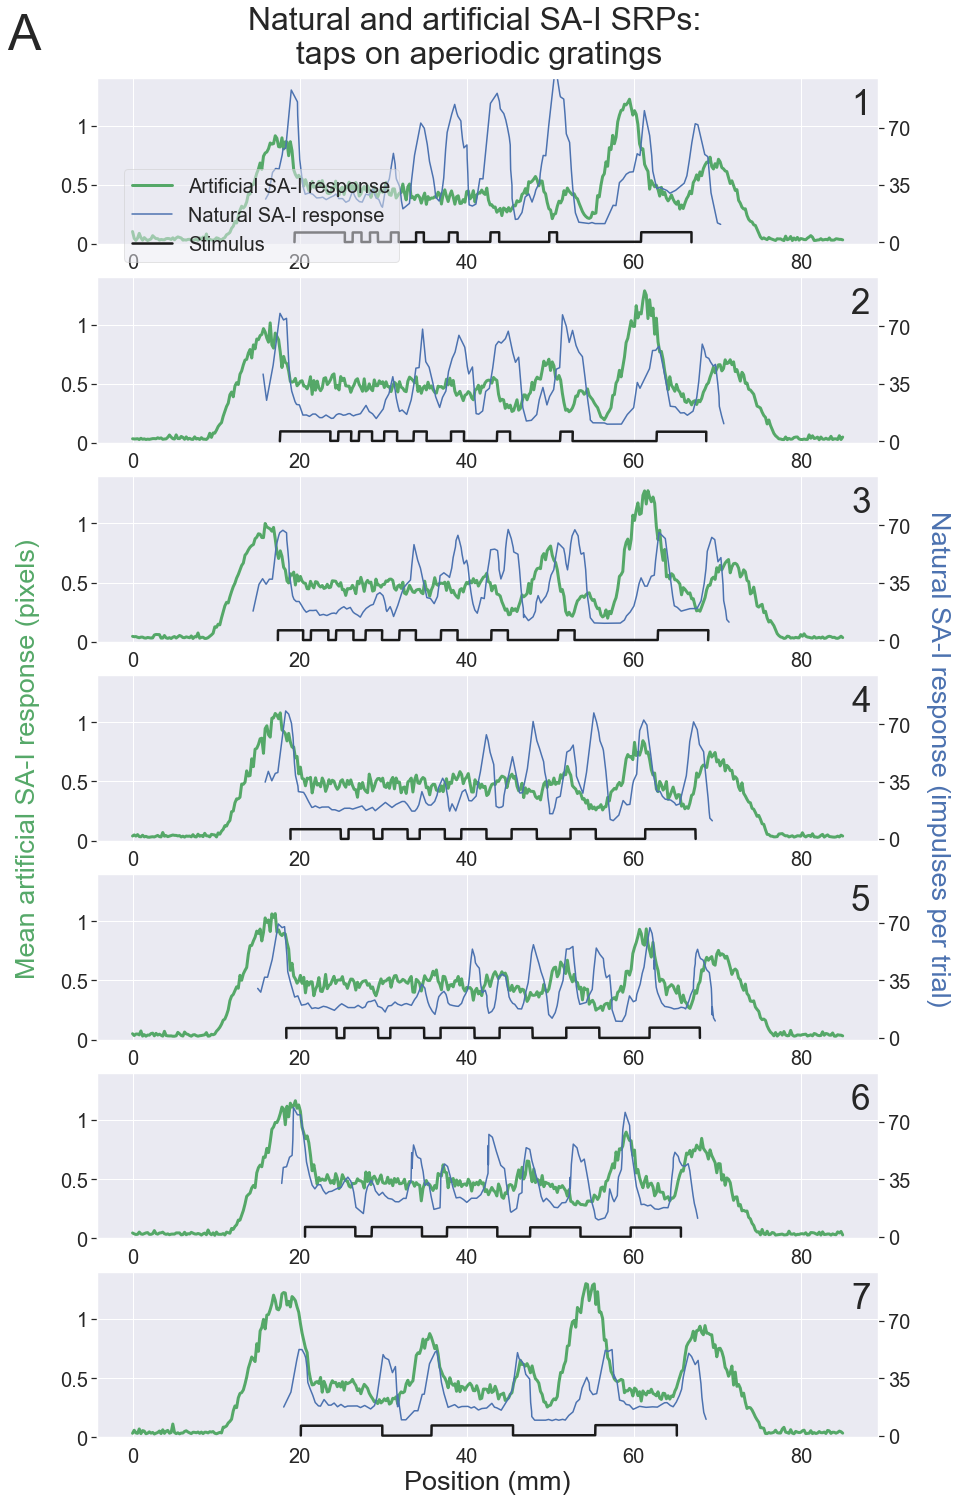

In [13]:
colours = sns.color_palette(sns.mpl_palette("Set2",5))
offsets = np.array([0, -1.75, -2, -0.5, -1, 1.25, 0.75]) + 19.39
r_positions = np.linspace(0, 85, n_positions)

fig6A, axs = subplots(n_stimuli,1, figsize = (14,25), sharex=False)
for i in range(n_stimuli):
    ax = [axs[i], axs[i].twinx(), axs[i].twinx()]
    if i==0:
        p1 = sns.lineplot(r_positions, np.stack(features_SA)[i,:,9,9], ax=ax[0], color='g', label="Artificial SA-I response", linewidth=3); p1.legend_.remove()
        p2 = sns.lineplot(ephys_data[i][:,0]*2+offsets[i], ephys_data[i][:,1], ax=ax[1], label="Natural SA-I response"); p2.legend_.remove()
        ax[2].plot(stim_data[i][:,0]+offsets[i], stim_data[i][:,1], color='k', linewidth=2.5, label="Stimulus")        
    else:
        sns.lineplot(r_positions, np.stack(features_SA)[i,:,9,9], ax=ax[0], color='g', linewidth=3)      
        sns.lineplot(ephys_data[i][:,0]*2+offsets[i], ephys_data[i][:,1], ax=ax[1])
        ax[2].plot(stim_data[i][:,0]+offsets[i], stim_data[i][:,1], color='k', linewidth=2.5)  
    if i==3:
        ax[0].set_ylabel("Mean artificial SA-I response (pixels)", color='g', fontsize=27)
        ax[0].yaxis.labelpad = 20
        ax[2].set_ylabel("Natural SA-I response (impulses per trial)", fontsize=27, rotation=-90, color='b')
        ax[2].yaxis.labelpad = 40       
    ax[0].set_xticklabels([0, 0, 20, 40, 60, 80], fontsize=20)
    ax[0].set_yticks([0, 0.5, 1])
    ax[0].set_yticklabels([0, 0.5, 1], fontsize=20)
    ax[0].set_ylim(0,1.4)
    ax[1].set_ylim(0, 50)
    ax[1].grid(False)
    ax[1].axis('off')
    ax[2].set_ylim(-1, 100)
    ax[2].set_yticks([0, 35, 70])
    ax[2].set_yticklabels([0, 35, 70], fontsize=20)
    ax[2].grid(False)
    ax[2].text(86, 78, f'{i+1}', fontsize=35)
ax[0].set_xlabel("Position (mm)", fontsize=27)
ax[2].text(-15, 845, 'A', fontsize=50)
fig6A.legend(loc=(0.13,0.825), fontsize=20, framealpha=0.5) # in different location when prints
fig6A.suptitle("Natural and artificial SA-I SRPs:\n taps on aperiodic gratings", y=0.92, size=32)

plt.tight_layout()
print(dir_figures + r"/fig6a.png")
fig6A.savefig(dir_figures + r"/fig6a.png")

### B

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should o

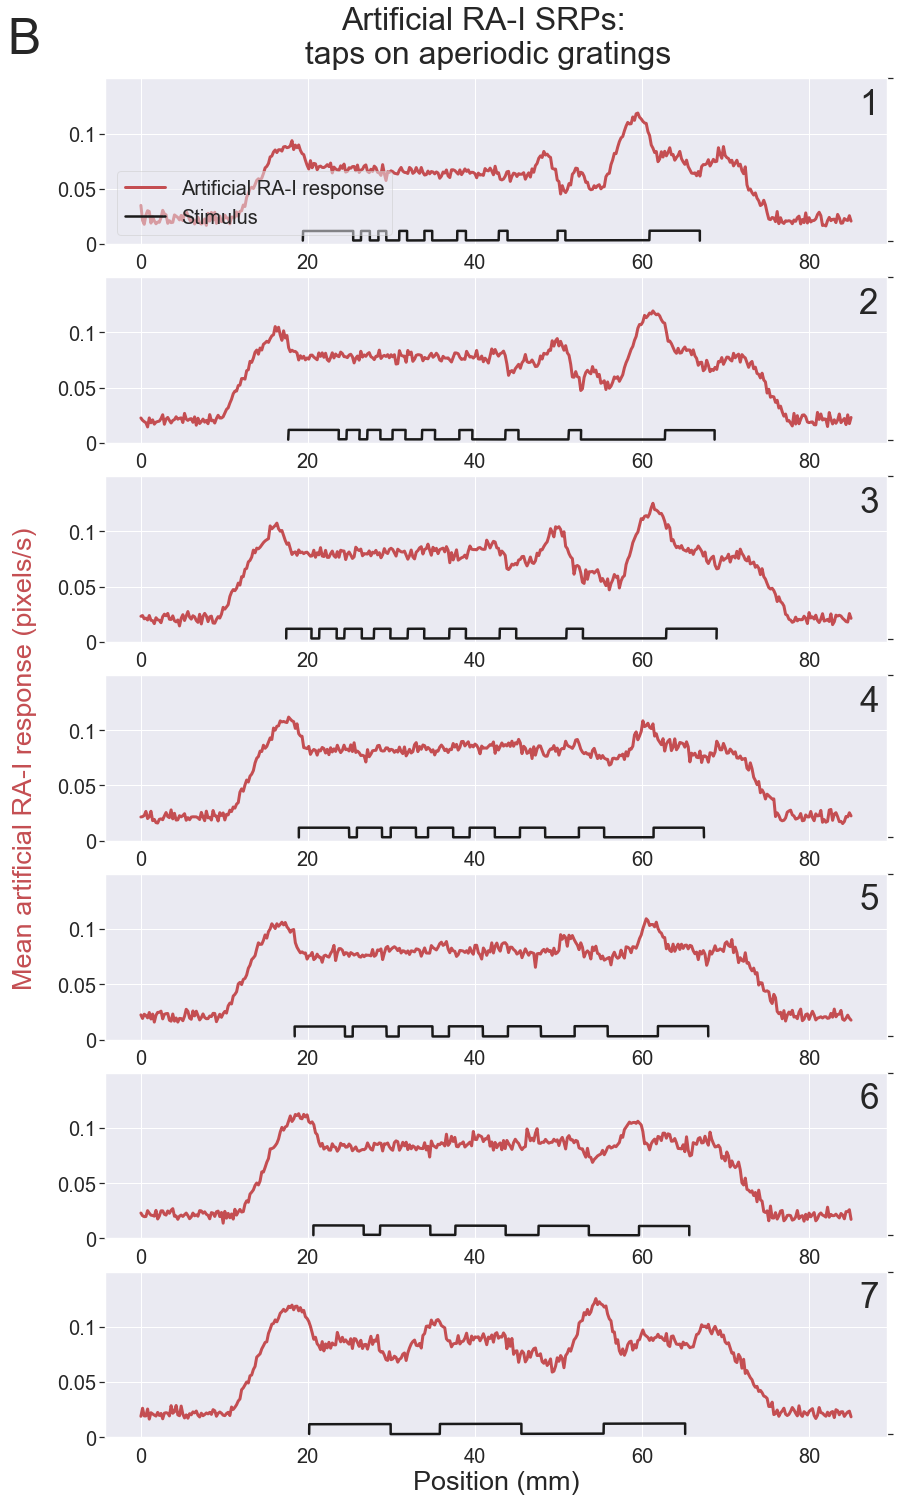

In [19]:
colours = sns.color_palette(sns.mpl_palette("Set2", 5))

fig6B, axs = subplots(7,1, figsize = (14,25), sharex = False)
for i in range(n_stimuli):
    ax = [axs[i], axs[i].twinx()]
    if i==0:
        p0 = sns.lineplot(r_positions, np.stack(features_RA)[i,:,9,9], ax = ax[0], color='r', label="Artificial RA-I response", linewidth=3); p0.legend_.remove()
        ax[1].plot(stim_data[i][:,0]+offsets[i], stim_data[i][:,1], color='k', linewidth=2.5, label="Stimulus")
    else:
        sns.lineplot(r_positions, np.stack(features_RA)[i,:,9,9], ax=ax[0], color='r', linewidth=3)  
        ax[1].plot(stim_data[i][:,0]+offsets[i], stim_data[i][:,1], color='k', linewidth=2.5)      
    if i==3:
        ax[0].set_ylabel("Mean artificial RA-I response (pixels/s)", fontsize=27, color='r')
        ax[0].yaxis.labelpad = 20
    ax[0].set_xticklabels([0, 0, 20, 40, 60, 80], fontsize=20)
    ax[0].set_ylim(0,0.15)
    ax[0].set_yticks((0, 0.05, 0.1))
    ax[0].set_yticklabels([0, 0.05, 0.10], fontsize=20)
    ax[1].set_ylim(-2,30)
    ax[1].set_yticks([0,100])
    ax[1].set_yticklabels([])
    ax[1].grid(False)
    ax[1].text(86, 78, f'{i+1}', fontsize=35)
ax[0].set_xlabel("Position (mm)", fontsize=27)
ax[1].text(-16, 850, 'B', fontsize=50)
fig6B.legend(loc=(0.13,0.843), fontsize=20, framealpha=0.5)
fig6B.suptitle("Artificial RA-I SRPs:\n taps on aperiodic gratings", y=0.92, size=32)

plt.tight_layout()
fig6B.savefig(dir_figures + r"/fig6b.png")

## Fig. 7

In [10]:
dir_data = os.environ["DATAPATH"] + r"/open/afferents-tactile-gratings-jrsi2022/experiment_2"
n_stimuli = 8
angles = ['270','90','270','90','270','90','270','90']

data = [open_obj(dir_data + rf"/processed/test_data/{i}/{angles[i]}/X_test_sa") for i in range(n_stimuli)]
labels = [open_obj(dir_data + rf"/processed/test_data/{i}/{angles[i]}/y_test_sa") for i in range(n_stimuli)]

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


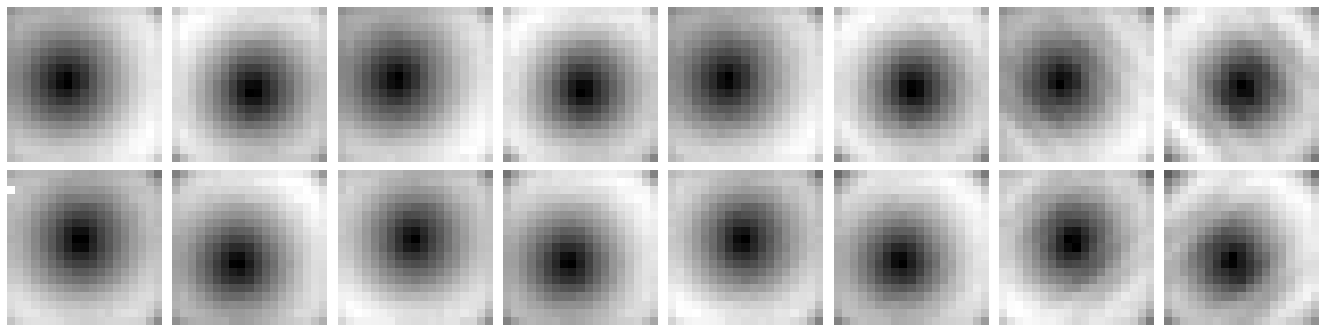

In [11]:
fig_data = [[], []]
for i in range(n_stimuli):
    fig_data[0].append(np.argwhere(np.array(labels)[i]==-45))
    fig_data[1].append(np.argwhere(np.array(labels)[i]==45))

fig7A = plt.figure(figsize=(23.5,6))
gs1 = gridspec.GridSpec(2,8)
gs1.update(wspace=0.07, hspace=0.001) 
n = 0
for i in range(2):
    for j in range(n_stimuli):
        ax = plt.subplot(gs1[n])
        ax.imshow(data[j][int(fig_data[i][j][0])], cmap='gray')
        n+=1
        plt.axis('off')

plt.tight_layout()
fig7A.savefig(dir_figures + r"/fig7a.png")

In [12]:
data = [open_obj(dir_data + rf"/processed/test_data/{i}/{angles[i]}/X_test_ra") for i in range(n_stimuli)]
labels = [open_obj(dir_data + rf"/processed/test_data/{i}/{angles[i]}/y_test_ra") for i in range(n_stimuli)]

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


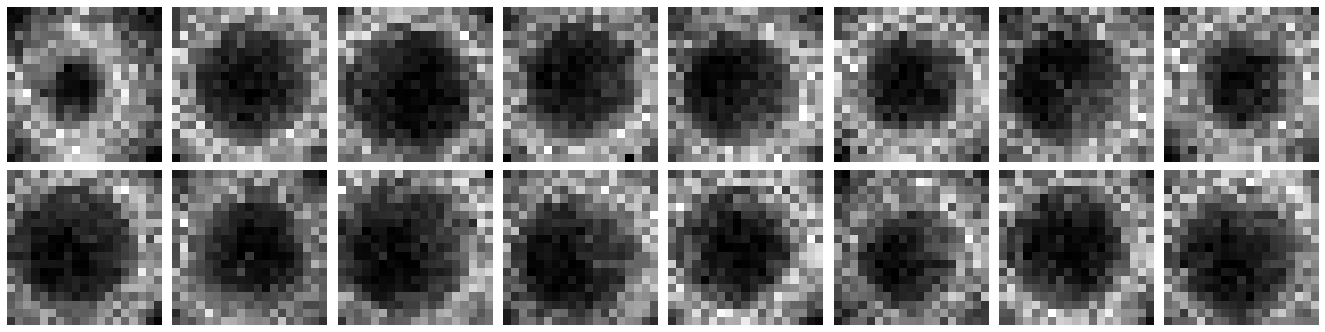

In [13]:
fig_data = [[], []]
for i in range(n_stimuli):
    fig_data[0].append(np.argwhere(np.array(labels)[i]==-45))
    fig_data[1].append(np.argwhere(np.array(labels)[i]==45))

fig7B = plt.figure(figsize=(23.5,6))
gs1 = gridspec.GridSpec(2,8)
gs1.update(wspace=0.07, hspace=0.001) 
n = 0
for i in range(2):
    for j in range(n_stimuli):
        ax = plt.subplot(gs1[n])
        ax.imshow(data[j][int(fig_data[i][j][0])], cmap='gray')
        n+=1
        plt.axis('off')

plt.tight_layout()
fig7B.savefig(dir_figures + r"/fig7b.png")

## Fig. 8

### A1

In [3]:
dir_data = os.environ["DATAPATH"] + r"/open/afferents-tactile-gratings-jrsi2022/experiment_2"
A = open_obj(dir_data + r"/models/A_SA")
B = open_obj(dir_data + r"/models/B_SA")

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


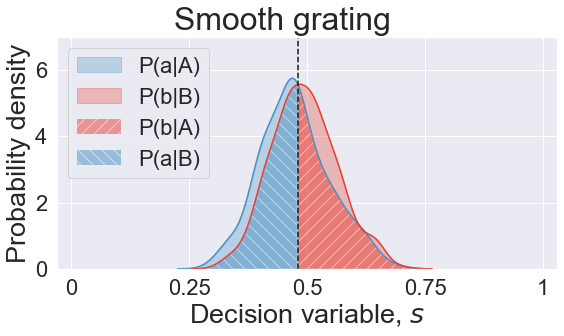

In [4]:
sns.set()
X_plot = np.linspace(-0.1, 1.1, 1000)[:, np.newaxis]
crossing = 483
    
fig8A1, axs = plt.subplots(1, figsize = (8,5))
current_palette = sns.color_palette()
sns.distplot(A[0], color=sns.color_palette("Blues_d")[2], bins=15, hist=False)
sns.distplot(B[0], color=sns.color_palette("Reds_d")[2], bins=15, hist=False)
axs.set_xlabel("Decision variable, $s$", size=27)
axs.set_ylabel("Probability density", size=27)
axs.axvline(x=X_plot[crossing], color='k', linestyle='--')
axs.set_xlim((-0.03,1.03))
axs.set_xticks((0,.25,.5,.75,1))
axs.set_xticklabels((0,0.25,0.5,0.75,1), size = 22)
axs.set_yticks((0,2,4,6))
axs.set_yticklabels((0,2,4,6), size=22)
axs.set_ylim((0,7))
plt.tight_layout()
kde_x_0, kde_y_0 = axs.lines[0].get_data()
kde_x_1, kde_y_1 = axs.lines[1].get_data()
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0<X_plot[crossing]), label="P(a|A)", interpolate=True, color=sns.color_palette("Blues_d")[2], alpha=0.3)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1>X_plot[crossing]), label="P(b|B)", interpolate=True, color=sns.color_palette("Reds_d")[2], alpha=0.3)
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0>X_plot[crossing]), label="P(b|A)", interpolate=True, hatch='//', facecolor=sns.color_palette("Reds_d")[2], linewidth=0.0, alpha=0.5)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1<X_plot[crossing]), label="P(a|B)", interpolate=True, hatch='\\\\', facecolor=sns.color_palette("Blues_d")[2], linewidth=0.0, alpha=0.5)
axs.legend(loc='upper left', fontsize=22)
fig8A1.suptitle("Smooth grating", y=0.93, size=32)

plt.tight_layout()
fig8A1.savefig(dir_figures + r"/fig8a1.png")

### A2

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


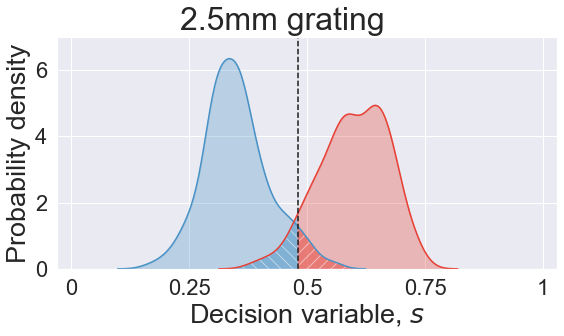

In [5]:
sns.set()
crossing = 483

fig8A2, axs = plt.subplots(1, figsize=(8,5))
current_palette = sns.color_palette()
sns.distplot(A[4], label="f(x$\mid$A)", color=sns.color_palette("Blues_d")[2], bins=15, hist=False)
sns.distplot(B[4], label="f(x$\mid$B)", color=sns.color_palette("Reds_d")[2], bins=15, hist=False)
axs.set_xlabel("Decision variable, $s$", size=27)
axs.set_ylabel("Probability density", size=27)
axs.axvline(x=X_plot[crossing], color='k', linestyle='--')
axs.set_xlim((-0.03, 1.03))
axs.set_xticks((0,.25,.5,.75,1))
axs.set_xticklabels((0,0.25,0.5,0.75,1), size=22)
axs.set_yticks((0,2,4,6))
axs.set_yticklabels((0,2,4,6), size=22)
axs.set_ylim((0,7))
plt.tight_layout()
kde_x_0, kde_y_0 = axs.lines[0].get_data()
kde_x_1, kde_y_1 = axs.lines[1].get_data()
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0<X_plot[crossing]), interpolate=True, color=sns.color_palette("Blues_d")[2], alpha=0.3)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1>X_plot[crossing]), interpolate=True, color=sns.color_palette("Reds_d")[2], alpha=0.3)
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0>X_plot[crossing]), interpolate=True, hatch ='//', facecolor=sns.color_palette("Reds_d")[2], linewidth=0.0, alpha=0.5)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1<X_plot[crossing]), interpolate=True, hatch ='\\\\', facecolor=sns.color_palette("Blues_d")[2], linewidth=0.0, alpha=0.5)
fig8A2.suptitle("2.5mm grating", y=0.93, size=32)

plt.tight_layout()
fig8A2.savefig(dir_figures + r"/fig8a2.png")

### A3

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


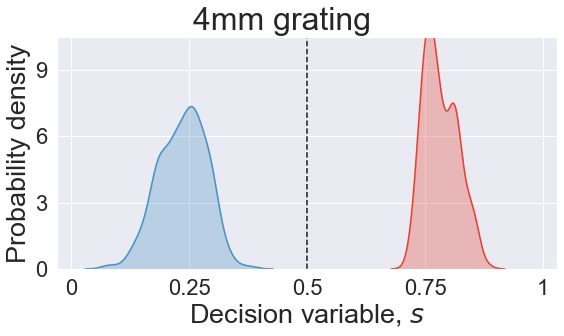

In [11]:
sns.set()
crossing = 500

fig8A3, axs = plt.subplots(1, figsize=(8,5))
current_palette = sns.color_palette()
sns.distplot(A[6], label="f(x$\mid$A)", color=sns.color_palette("Blues_d")[2], bins=15, hist=False)
sns.distplot(B[6], label="f(x$\mid$B)", color=sns.color_palette("Reds_d")[2], bins=15, hist=False)
axs.set_xlabel("Decision variable, $s$", size=27)
axs.set_ylabel("Probability density", size=27)
axs.axvline(x=X_plot[crossing], color='k', linestyle='--')
axs.set_xlim((-0.03,1.03))
axs.set_xticks((0,.25,.5,.75,1))
axs.set_xticklabels((0,0.25,0.5,0.75,1), size=22)
axs.set_yticks((0,3,6,9))
axs.set_yticklabels((0,3,6,9), size=22)
axs.set_ylim((0,10.5))
plt.tight_layout()
kde_x_0, kde_y_0 = axs.lines[0].get_data()
kde_x_1, kde_y_1 = axs.lines[1].get_data()
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0<X_plot[crossing]), interpolate=True, color=sns.color_palette("Blues_d")[2], alpha=0.3)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1>X_plot[crossing]), interpolate=True, color=sns.color_palette("Reds_d")[2], alpha=0.3)
axs.fill_between(kde_x_0, kde_y_0, where=(kde_x_0>X_plot[crossing]), interpolate=True, hatch ='//', facecolor=sns.color_palette("Reds_d")[2], linewidth=0.0, alpha=0.5)
axs.fill_between(kde_x_1, kde_y_1, where=(kde_x_1<X_plot[crossing]), interpolate=True, hatch ='\\\\', facecolor=sns.color_palette("Blues_d")[2], linewidth=0.0, alpha=0.5)
fig8A3.suptitle("4mm grating", y=0.93, size=32)

plt.tight_layout()
fig8A3.savefig(dir_figures + r"/fig8a3.png")

### B

In [7]:
custom_style = {'axes.edgecolor': 'black',
               'xtick.color': 'black',
               'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [8]:
circles_s2 = np.loadtxt(open(dir_data + r"/test_data/circles_s2.csv", "rb"), delimiter=",")
circles_s1 = np.loadtxt(open(dir_data + r"/test_data/circles_s1.csv", "rb"), delimiter=",")
triangles_s2 = np.loadtxt(open(dir_data + r"/test_data/triangles_s2.csv", "rb"), delimiter=",")
triangles_s1 = np.loadtxt(open(dir_data + r"/test_data/triangles_s1.csv", "rb"), delimiter=",")
squares_s2 = np.loadtxt(open(dir_data + r"/test_data/squares_s2.csv", "rb"), delimiter=",")
squares_s1 = np.loadtxt(open(dir_data + r"/test_data/squares_s1.csv", "rb"), delimiter=",")

SA_s2 = open_obj(dir_data + r"/models/p_s2_SA")
SA_s1 = open_obj(dir_data + r"/models/p_s1_SA")
RA_s2 = open_obj(dir_data + r"/models/p_s2_RA")
RA_s1 = open_obj(dir_data + r"/models/p_s1_RA")

#SA_s2[1] = np.nan

s1 = [0,-1,-1.5,-2,-2.5,-3,-4,-5]
s2 = [0,1,1.5,2,2.5,3,4,5]

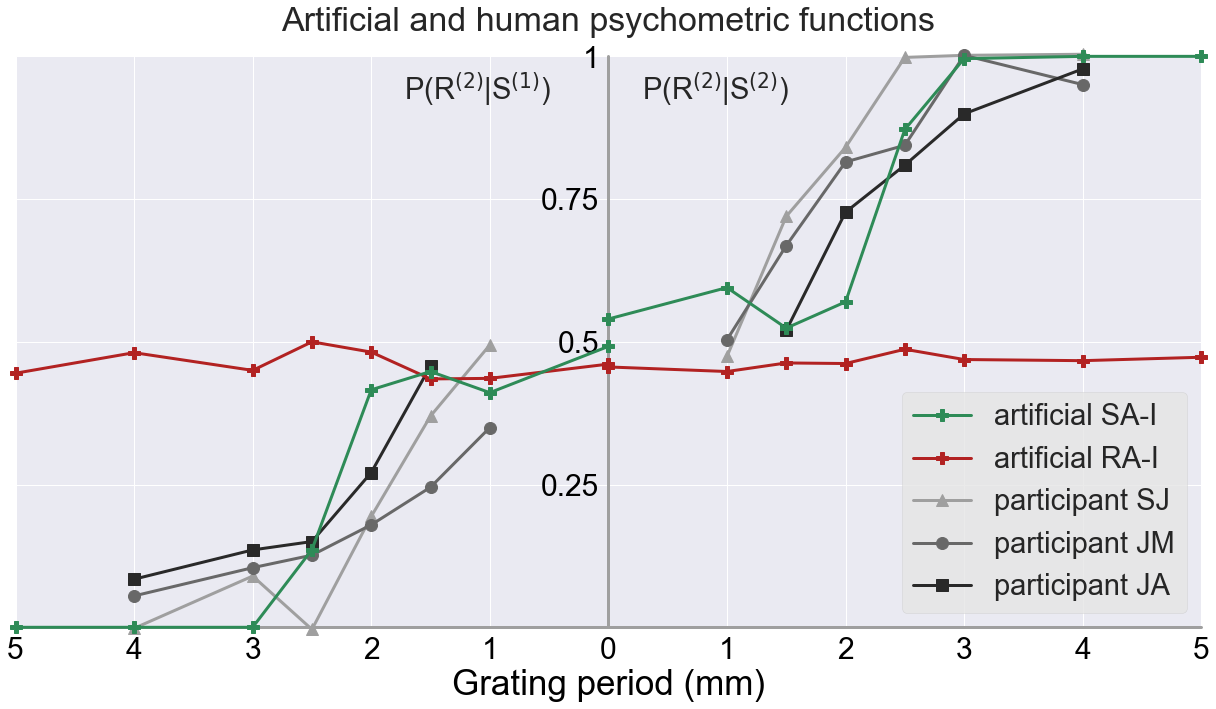

In [9]:
cmap = cm.get_cmap('Greys')
SJ = cmap(120)
JM = cmap(170)
JA = cmap(220)

fig8B, axs = plt.subplots(1, figsize = (17,10))
plt.style.use('ggplot')
axs.plot(s2, SA_s2, '-P', markersize=12, linewidth=3, label='artificial SA-I', color='seagreen', clip_on=False, zorder=11)
axs.plot(s1, SA_s1, '-P', markersize=12, linewidth=3, color='seagreen', clip_on= False, zorder=11)
axs.plot(s2, RA_s2, '-P', markersize=12, linewidth=3, label='artificial RA-I', color = 'firebrick', clip_on=False, zorder=10)
axs.plot(s1, RA_s1, '-P', markersize=12, linewidth=3, color='firebrick', clip_on= False, zorder =10)
axs.plot(s2[1:-1], triangles_s2[:,1], '-^', markersize=12, linewidth=3, label='participant SJ', color=SJ, clip_on=False, zorder=9)
axs.plot(s1[1:-1], triangles_s1[:,1], '-^', markersize=12, linewidth=3, color=SJ, clip_on = False, zorder=9)
axs.plot(s2[1:-1], circles_s2[:,1], '-o', markersize=12, linewidth=3, label='participant JM', color=JM, clip_on=False, zorder=9)
axs.plot(s1[1:-1], circles_s1[:,1], '-o', markersize=12, linewidth=3, color=JM, clip_on=False, zorder=9)
axs.plot(s2[2:-1], squares_s2[:,1], '-s', markersize=12, linewidth=3, label='participant JA', color=JA, clip_on=False, zorder=9)
axs.plot(s1[2:-1], squares_s1[:,1], '-s', markersize=12, linewidth=3, color=JA, clip_on=False, zorder=9)
axs.plot([-5,5],[0,0],'-', linewidth=3, color=SJ, clip_on=False, zorder=9)
axs.plot([0,0],[0,1],'-', linewidth=3, color=SJ, clip_on=False, zorder=9)
axs.spines['left'].set_position('center')
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')
axs.set_xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
axs.set_xticklabels([5,4,3,2,1,0,1,2,3,4,5], fontsize=30)
axs.set_yticks([0.25,0.5,0.75,1])
axs.set_yticklabels([0.25,0.5,0.75,1], fontsize=30)
axs.xaxis.label.set_color('black')
axs.tick_params(axis="x", colors="black")
axs.tick_params(axis="y", colors="black")
axs.set_xlim((-5,5))
axs.set_ylim((0,1))
axs.set_xlabel("Grating period (mm)", size=35)
axs.legend(loc='lower right', fontsize=29)
axs.text(0.28,0.925,'P(R$^{(2)}$|S$^{(2)}$)', fontsize=29)
axs.text(-1.72,0.925,'P(R$^{(2)}$|S$^{(1)}$)', fontsize=29)
plt.tight_layout()
fig8B.suptitle("Artificial and human psychometric functions", y=0.98, size=34)

plt.tight_layout()
fig8B.savefig(dir_figures + r"/fig8b.png")